# Project 1 - Predicting 18 year olds Weight from Height

### The dataset below contains 25,000 synthetic records of human heights and weights of 18 year olds. These data were simulated based on a 1993 by a Growth Survey of 25,000 children from birth to 18 years of age from UCLA. It contains only the height (inches) and weights (pounds) of 25,000 different humans of 18 years of age. This dataset can be used to build a model that can predict the heights or weights of a human.

##### 0. Imports

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ydata_profiling as pp

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor

##### 2. Load data

In [17]:
# 1. Load in data

df = pd.read_csv("data\Linear Regression Data\height-weight-dataset.csv")

df.head()

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


##### 3. Exploratory Data Analysis

In [18]:
# Checking summary statistics
round(df.describe(), 2)

,Index,Height(Inches),Weight(Pounds)
count,25000.00,25000.00,25000.00
mean,12500.50,67.99,127.08
std,7217.02,1.90,11.66
min,1.00,60.28,78.01
25%,6250.75,66.70,119.31
50%,12500.50,68.00,127.16
75%,18750.25,69.27,134.89
max,25000.00,75.15,170.92


In [19]:
# Checking data types
df.dtypes

Index               int64
Height(Inches)    float64
Weight(Pounds)    float64
dtype: object

In [20]:
# Checking missing values
df.isna().sum()

Index             0
Height(Inches)    0
Weight(Pounds)    0
dtype: int64

In [21]:
# Checking for duplicates
df.duplicated().sum()

0

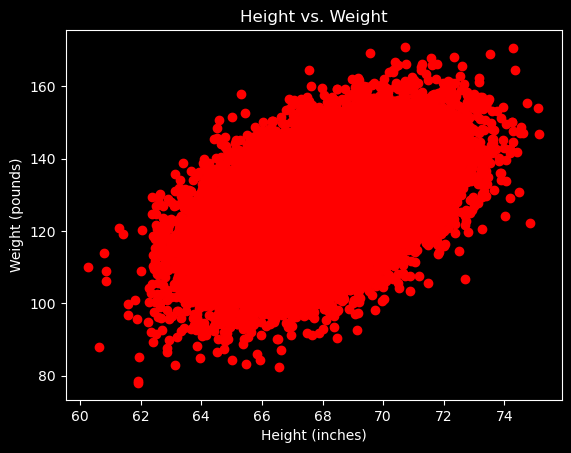

In [22]:
x_value = df["Height(Inches)"]
y_value = df["Weight(Pounds)"]
plt.scatter(x_value, y_value, color="r", marker="o")
plt.title("Height vs. Weight")
plt.xlabel("Height (inches)")
plt.ylabel("Weight (pounds)")
plt.show()

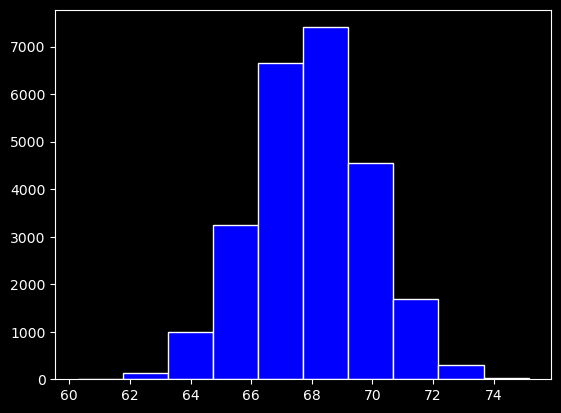

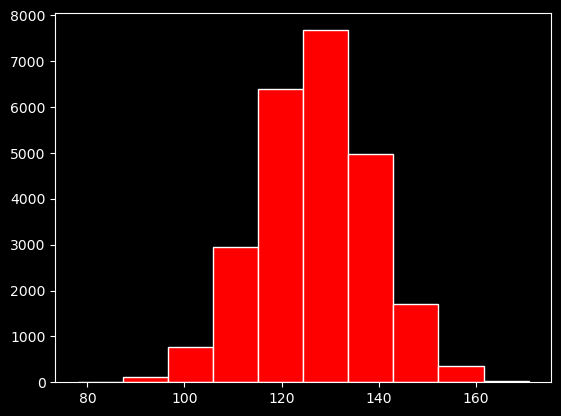

<Figure size 640x480 with 0 Axes>

In [23]:
plt.hist(df["Height(Inches)"], bins=10, color="blue", edgecolor="white")
plt.show()
plt.hist(df["Weight(Pounds)"], bins=10, color="red", edgecolor="white")
plt.show()

plt.tight_layout()



In [24]:
pp.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [11]:
# Based upon EDA profiling report, not much is needed.
# Will round numbers to 2 d.p. for ease of interpretation and will drop index column as should not be necessary.

##### 4. Data Pre-Processing

In [25]:
# Based on EDA report, completing the following actions:

# Drop column: 'Index'



df = df.drop(columns=["Index"])


# Round columns 'Height(Inches)', 'Weight(Pounds)' (Number of decimals: 2)



df = df.round({"Height(Inches)": 2, "Weight(Pounds)": 2})


df.head()

,Height(Inches),Weight(Pounds)
0,65.78,112.99
1,71.52,136.49
2,69.40,153.03
3,68.22,142.34
4,67.79,144.30


In [26]:
# Split data into input and output objects
X = df.drop(["Weight(Pounds)"], axis=1)
y = df["Weight(Pounds)"]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

##### 5. Model Building 

In [28]:

# Instantiate our model object

regressor = LinearRegression()


# Train our model

regressor.fit(X_train, y_train)

LinearRegression()

##### 6. Model Assessment

In [29]:
# Assess model r2 score i.e. how much of the variance around the mean is explained by the model

y_pred = regressor.predict(X_test)
r2_score(y_test, y_pred)


0.26059207672051365

In [30]:
# Assess model accuracy
root_mean_squared = np.sqrt(np.mean((y_test - y_pred) ** 2))
root_mean_squared

10.123632027096342

In [31]:
final_data = pd.merge(X_test, y_test, how = "inner", on = X_test.index)
final_data.drop("key_0", axis = 1, inplace=True)


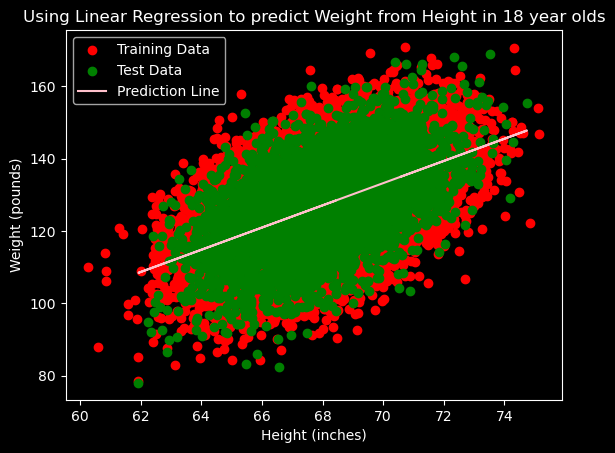

In [32]:
#plt.scatter(final_data["Height(Inches)"], final_data["Weight(Pounds)"], color="red", label = "Training Data")
plt.scatter(X_train, y_train, color = "red", label = "Training Data")
plt.scatter(X_test, y_test, color = "green", label = "Test Data")
#plt.scatter(final_data["Height(Inches)"], y_pred, color = "blue", label = "Predictions")
plt.plot(final_data["Height(Inches)"], y_pred, color="pink", label = "Prediction Line")
plt.xlabel("Height (inches)")
plt.ylabel("Weight (pounds)")
plt.title("Using Linear Regression to predict Weight from Height in 18 year olds")
plt.legend()

In [47]:
# Instantiate our model object

regressor = DecisionTreeRegressor(min_samples_leaf=2000)


# Train our model

regressor.fit(X_train, y_train)

# Assess model accuracy

y_pred = regressor.predict(X_test)
r2_score(y_test, y_pred)

0.23632964642388932

In [48]:
# Assess model accuracy
root_mean_squared = np.sqrt(np.mean((y_test - y_pred) ** 2))
root_mean_squared

10.288386400249582

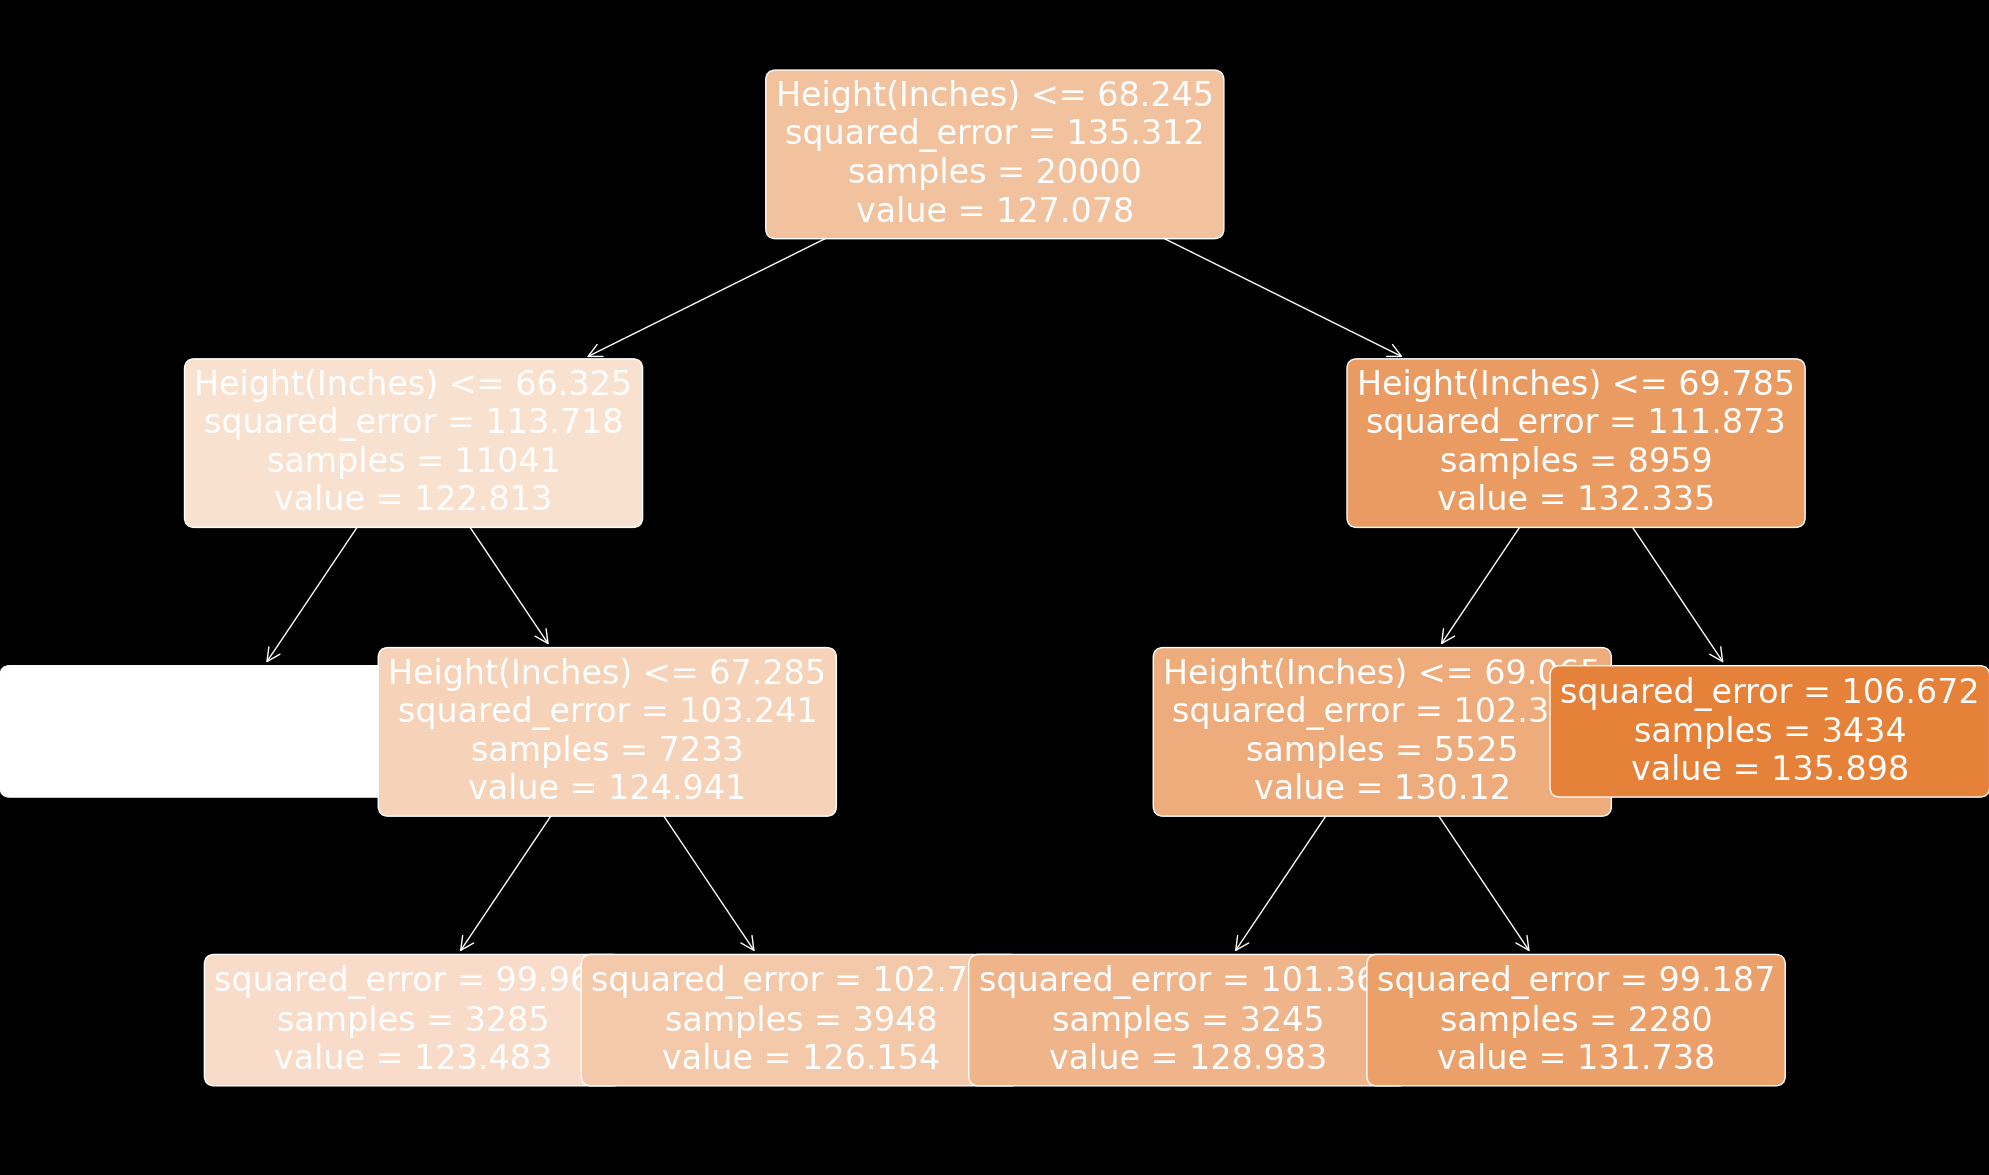

In [49]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(25, 15))

tree = plot_tree(
    regressor, feature_names=list(X.columns), filled=True, rounded=True, fontsize=24
)

In [52]:
# Instantiate our model object

regressor = RandomForestRegressor(n_estimators=1000)


# Train our model

regressor.fit(X_train, y_train)

# Assess model accuracy

y_pred = regressor.predict(X_test)
r2_score(y_test, y_pred)

0.2227331989236062